<a href="https://colab.research.google.com/github/SyarifulMsth/BecomeMachineLearningDev/blob/main/Unsupervised_learning_dengan_teknik_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised learning dengan teknik K-Means Clustering.
======================================================
Studi Kasus 
Data pengunjung sebuah mall fiktif.

In [ ]:
import pandas as pd 

# mengubah dataset menjadi dataframe 
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
# mengubah nama kolom agar lebih seragam 
df = df.rename(columns={'Gender':'gender', 'Age':'age',
                        'Annual Income (k$)':'annual_income',
                        'Spending Score (1-100)':'spending_score'})

# mengubah data kategorik menjadi data numerik atau disebut juga proses one hot encoding 
df['gender'].replace(['Female','Male'],[0,1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [ ]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender 
X = df.drop(['CustomerID', 'gender'], axis=1)

# membuat list yang berisi inertia 
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

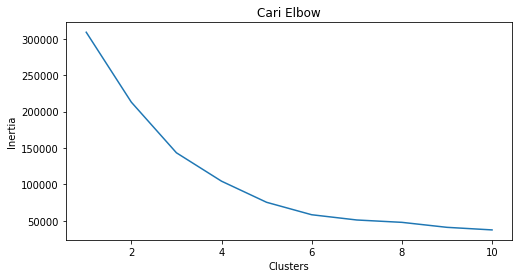

In [ ]:
# membuat plot inersia dari setiap nilai K. Sesuai plot di bawah, kita bisa melihat bahwa elbow berada di nilai K sama dengan 5,
# di mana penurunan inersia tidak lagi signifikan setelah nilai K sama dengan 5

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


Terakhir kita bisa melatih kembali K-Means dengan jumlah K yang didapat dari metode Elbow. Lalu kita bisa membuat plot hasil pengklasteran K-Means dengan menjalankan kode di bawah.



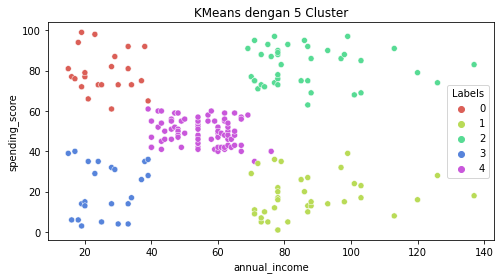

In [ ]:
# membuat objek KMeans 
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset 
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster 
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 5 Cluster')
plt.show()